# JOBS DATA PARSING AND WRANGLING


##### Libraries used:
* pandas
* re
* numpy
* seaborn
* matplotlib
* ElementTree

## Introduction

This notebook goal is to parse the jobs data in a provided ***xml file*** that is collected from multiple jobs websites in UK such as 'totaljobs.com', 'jobsite.co.uk'... from 2012 to 2014 into a dataset following the format: 

Column         | Description
---------------|-----------------------------------------------------------------------------------------------------
Id             | [Integer] 8 digit integer. Note you should not change the values of the Id.
Title          | [String] If there is no title information, the value should be ‘non-specified’
Location       | [String] If there is no location information, the value should be ‘non-specified’.
Company        | [String] If there is no company information, the value should be ‘non-specified’.
ContracType    | [String] It could be ‘full_time’, ‘part_time’ or ‘non-specified’.
ContractTime   | [String] It could be ‘permanent’, ‘contract’ or ‘non-specified’.
Category       | [String] There are 8 possible categories: ‘IT Jobs’, ‘Healthcare & Nursing Jobs’, ‘Engineering Jobs’, ‘Accounting & Finance Jobs’, ‘Sales Jobs’, ‘Hospitality & Catering Jobs’, ‘Teaching Jobs’, ‘PR, Advertising & Marketing Jobs’.8 digit Id of the job advertisement
Salary         | [Float] All the values need to be expressed to two decimal places, e.g., 80000.25. Also, all salary values must be valid float numbers and not null.
OpenDate       | [Datetime] All the values need to be in the datetime format, yyyy-mm-dd hh:mm:ss,
CloseDate      | [Datetime] All the values need to be in the datetime format, yyyy-mm-dd hh:mm:ss,e.g.,
SourceName     | [String] If there is no source information, the value should be ‘non-specified’.

Each variables are handled and cleaned so that they stricly follow the required format. Other data problems are also put into consideration and proper methods for each are applied.

## Import Libraries

In [3]:
import xml.etree.ElementTree as etree    
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# display configuration
from IPython.display import display

# config pd to display the data fully
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

## 1. Parsing Data
Parse jobs data from `dataset1.xml`

In [5]:
tree = etree.parse("./dataset1.xml")  

### 1.1. Examine the XML file with ElementTree

In [7]:
root = tree.getroot()     
root.tag

'Advertisements'

The root element of the data file is the `Advertisement` element that represents the **dataset data information**.

In [9]:
# Examine the child of 'Advertisement'
for child in root:
    print(child) 

<Element 'Source' at 0x7fead887c2c0>
<Element 'Source' at 0x7fead98fc590>
<Element 'Source' at 0x7fead9cbfa40>
<Element 'Source' at 0x7feada233360>
<Element 'Source' at 0x7feada75c810>
<Element 'Source' at 0x7feadb44f2c0>
<Element 'Source' at 0x7feadb7c55e0>
<Element 'Source' at 0x7feadb7fd720>
<Element 'Source' at 0x7feadb818310>
<Element 'Source' at 0x7feadb9d7860>
<Element 'Source' at 0x7feadbbd8a40>
<Element 'Source' at 0x7feadbcdc540>
<Element 'Source' at 0x7feadc199590>
<Element 'Source' at 0x7feadc1bc2c0>
<Element 'Source' at 0x7feadc50f860>
<Element 'Source' at 0x7feadc6d92c0>
<Element 'Source' at 0x7feadc7cdf40>
<Element 'Source' at 0x7feadc917ae0>
<Element 'Source' at 0x7feadc935360>
<Element 'Source' at 0x7feadca60630>
<Element 'Source' at 0x7feadcb2a4a0>
<Element 'Source' at 0x7feadcb64db0>
<Element 'Source' at 0x7feadcc22b30>
<Element 'Source' at 0x7feadcca0db0>
<Element 'Source' at 0x7feadcd5c950>
<Element 'Source' at 0x7feadcd95130>
<Element 'Source' at 0x7feadce12ea0>
<

Under `Advertisement` are `Source` elements that represents the **source that provide the job advertisements**.

In [11]:
# Examine elements under 'Source'
len(root[0])

9224

In [12]:
for child in root[0]:
    print(child)

<Element 'Row' at 0x7fead887ca40>
<Element 'Row' at 0x7fead887ce50>
<Element 'Row' at 0x7fead8876400>
<Element 'Row' at 0x7fead8897450>
<Element 'Row' at 0x7fead88978b0>
<Element 'Row' at 0x7fead8897d60>
<Element 'Row' at 0x7fead8877270>
<Element 'Row' at 0x7fead88776d0>
<Element 'Row' at 0x7fead8877ae0>
<Element 'Row' at 0x7fead8877f90>
<Element 'Row' at 0x7fead888e450>
<Element 'Row' at 0x7fead888e860>
<Element 'Row' at 0x7fead888ec20>
<Element 'Row' at 0x7fead8883130>
<Element 'Row' at 0x7fead8883590>
<Element 'Row' at 0x7fead8883a40>
<Element 'Row' at 0x7fead8883ea0>
<Element 'Row' at 0x7fead8887630>
<Element 'Row' at 0x7fead8887270>
<Element 'Row' at 0x7fead8887c20>
<Element 'Row' at 0x7fead8887a40>
<Element 'Row' at 0x7fead888a3b0>
<Element 'Row' at 0x7fead888a7c0>
<Element 'Row' at 0x7fead888ac20>
<Element 'Row' at 0x7fead888d450>
<Element 'Row' at 0x7fead888d220>
<Element 'Row' at 0x7fead888d7c0>
<Element 'Row' at 0x7fead888dcc0>
<Element 'Row' at 0x7fead88a1130>
<Element 'Row'

In [13]:
root[0][0]

<Element 'Row' at 0x7fead887ca40>

Under `Source` are `Row` elements that represents **job advertisements**.

In [15]:
# Examine the 'Row' under 'Source'
for child in root[0][0]:
    print(child)

<Element 'Id' at 0x7fead887cb80>
<Element 'Title' at 0x7fead887cc20>
<Element 'Location' at 0x7fead887cc70>
<Element 'Company' at 0x7fead887cbd0>
<Element 'ContractType' at 0x7fead887cb30>
<Element 'ContractTime' at 0x7fead887cf40>
<Element 'Category' at 0x7fead887cef0>
<Element 'Salary' at 0x7fead887cf90>
<Element 'Date' at 0x7fead887cd10>


Each job advertisement has elements that are its attributes. These will be used for the dataset variables.

### 1.2. Parsing data into the required format
- Due to a large number of data entries ('row' for job advertisement), ***Data Dictionary*** approach is applied where a dictionary is defined with keys that are corresponding to the columns and value are arrays that store the attribute value.
- This method is sensitive to missing data as parsing since all *the value of each attribute must be indexed accurately* to retrive the correct data entries.

In [18]:
# define a data dictionary for the dataframe
dataDict = {}
dataDict['Id'] = []
dataDict['Title'] = []
dataDict['Location'] = []
dataDict['Company'] = []
dataDict['ContractType'] = []
dataDict['ContractTime'] = []
dataDict['Category'] = []
dataDict['Salary'] = []
dataDict['OpenDate'] = []
dataDict['CloseDate'] = []
dataDict['SourceName'] = []

##### Examine whether there are any missing values in the xml file

In [20]:
for tag in dataDict.keys():
    element_count = len(root.findall(f'./Source/Row/{tag}'))
    print(f"Number of {tag} elements: {element_count}")

Number of Id elements: 50753
Number of Title elements: 50753
Number of Location elements: 50753
Number of Company elements: 50096
Number of ContractType elements: 43633
Number of ContractTime elements: 48040
Number of Category elements: 50753
Number of Salary elements: 50482
Number of OpenDate elements: 0
Number of CloseDate elements: 0
Number of SourceName elements: 0


It can be seen that `Company`, `ContractType`, `ContractTime`, and `Salary` have missing values => As parsing through the xml tree these values are filled with **np.nan**.

- `OpenDate` and `CloseDate` are under the `Date` element.
- `SourceName` is get by the `SrcName` attribute of the `Source` element

##### Fill the data dictionary

In [23]:
# Map for the tag (OpenDate, AfterDate) path
tag_map = {
        'OpenDate': './Date/OpenDate',
        'CloseDate': './Date/CloseDate'
}

for source in root: # for each source
    for child in source: # for each row (job advertisement) 
        for tag in dataDict.keys():
            if (tag == 'SourceName'): 
                dataDict['SourceName'].append(source.attrib['SrcName']) # get SourceName
            else:
                element = child.find(tag_map.get(tag, tag)) # get the attributes through the corresponding tag
                dataDict[tag].append(element.text if element is not None else np.nan)


In [24]:
# examine the data dictionary
for key, value in dataDict.items():
    print(f"Length of array at {key}: {len(value)}")

Length of array at Id: 50753
Length of array at Title: 50753
Length of array at Location: 50753
Length of array at Company: 50753
Length of array at ContractType: 50753
Length of array at ContractTime: 50753
Length of array at Category: 50753
Length of array at Salary: 50753
Length of array at OpenDate: 50753
Length of array at CloseDate: 50753
Length of array at SourceName: 50753


In [25]:
# convert to pandas dataframe
df = pd.DataFrame(dataDict)

# get samples from the dataframe
df.head(5)

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,68677473,Fluent Polish Speaking Incident Manager Krakow...,UK,Proxime,,permanent,IT Jobs,6000,20131102T150000,20140131T150000,totaljobs.com
1,71851065,GIS Trainer Central London Permanent ****k*...,London,Locum Staffing Ltd,,permanent,IT Jobs,40000,20120430T150000,20120530T150000,totaljobs.com
2,68665487,Trafficker/Ad Op's Manager,South East London,Savvy Media Group,,permanent,IT Jobs,40000,20120827T150000,20121026T150000,totaljobs.com
3,68685701,PR Associate Director,Oxfordshire,Pure Recruitment,,contract,"PR, Advertising & Marketing Jobs",55000,20120315T150000,20120329T150000,totaljobs.com
4,66960212,Accounts Payable Administrator,Littlehampton,The Recruitment Consultancy Ltd,,permanent,Accounting & Finance Jobs,,20120723T000000,20121021T000000,totaljobs.com


## Task 2. Auditing and cleaning the data

### 2.1. Init Errors List and utilities
**Errors List** dataframe is initialized with the required columns. After each modification attempt, changes are logged following the format of this `errors_df` row.


Column         | Description
---------------|-----------------------------------------------------------------------------------------------------
indexOfdf      | Index of the record/row in the original dataset. If the data issue involves all rows, put “ALL”.
Id             | Id of the job advertisement that has the data issue. If the data issue involves all job records, put “ALL”.
ColumnName     | The name(s) of the column that the data issue locates.<br><br> - If the data issue involves more than one column, put multiple column names separated by a comma, e.g., “Cloname1,Colname2,Colname3”.<br><br> - If the data issue involves all columns, put “ALL”.
Original       | The original value of the cell. If the data issue involves all rows with different cell values, put “ALL”.
Modified       | The modified value of the cell. If the data issue involves all rows with different modified cell values, put “ALL”.
ErrorType      | The type of errors, for example, Missing Values, Violation of Integrity Constraint, Outliers, or any other errors you found.
Fixing         | Describe how did you fix this problem



In [28]:
# Create an empty log DataFrame
errors_df = pd.DataFrame(columns=['indexOfdf', 'Id', 'ColumnName', 'Original', 'Modified', 'ErrorType', 'Fixing'])

**Utilities** are defined to utilized over the project:

- `log_change` compares the original dataframe with the cleaned dataframe and add changed rows to the `errors_df`
- `replace_values` to replace the *missing values* of certain features.

In [30]:
# function to log 
def log_change(column, original_df, modified_df, error, fixing):
    """
    Logs changes made to a DataFrame by comparing it with the original DataFrame.
    
    Parameters:
    - column (str): The column that need to be compared
    - original_df (pandas.DataFrame): The original DataFrame before changes were made.
    - modified_df (pandas.DataFrame): The modified DataFrame after changes were made.
    - error (str): Description of the error of that got fixed
    - fixing (str): Approach that are used to fix  
    """
    global errors_df
    
    diff = original_df[column].compare(modified_df[column])  # Find the differences
    
    for row_idx, row in diff.iterrows():        # iter through the difference table
        id = original_df.loc[row_idx, 'Id']     # get the id of the job advertisement
        original_value = row['self']
        modified_value = row['other']
        
        log_entry = {
            'indexOfdf': row_idx,
            'Id': id,
            'ColumnName': column,
            'Original': original_value,
            'Modified': modified_value,
            'ErrorType': error,
            'Fixing': fixing
        }

        errors_df = pd.concat([errors_df, pd.DataFrame([log_entry])], ignore_index=True)

In [31]:
def replace_values(x):
    return 'non-specified' if pd.isna(x) or re.match(r'^\s*$|N/A$|\-', x) else x

### 2.2. General overview on the dataset

In [33]:
print('\n____________ Dataset info ____________')
display(df.info())              
print('\n____________ Statistics of features ____________')
display(df.describe())  


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50753 entries, 0 to 50752
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            50753 non-null  object
 1   Title         50753 non-null  object
 2   Location      50753 non-null  object
 3   Company       50096 non-null  object
 4   ContractType  43633 non-null  object
 5   ContractTime  48040 non-null  object
 6   Category      50753 non-null  object
 7   Salary        50482 non-null  object
 8   OpenDate      50753 non-null  object
 9   CloseDate     50753 non-null  object
 10  SourceName    50753 non-null  object
dtypes: object(11)
memory usage: 4.3+ MB


None


____________ Statistics of features ____________


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
count,50753,50753,50753,50096,43633,48040,50753,50482,50753,50753,50753
unique,50753,50750,496,8774,5,5,8,3431,2194,2416,107
top,68677473,Fire & Security Engineer London,UK,,,permanent,IT Jobs,35000,20130626T150000,20130626T000000,totaljobs.com
freq,1,2,7698,2132,16815,31009,13170,1748,42,40,9224


##### Check the missing values

In [35]:
df.isnull().sum()

Id                 0
Title              0
Location           0
Company          657
ContractType    7120
ContractTime    2713
Category           0
Salary           271
OpenDate           0
CloseDate          0
SourceName         0
dtype: int64

- `Company` has 657 missing values.
- `ContractType` has 7120 missing values.
- `ContractTime` has 2713 missing values.
- `Salary` has 271 missing values
  
=> these will be handled correspondingly under this notebook.

Create a copy of the dataframe and perform the **cleaning, wrangling** process on it.

In [37]:
df_clean = df.copy()

In [38]:
# examine the df_clean
df_clean.head(2)

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,68677473,Fluent Polish Speaking Incident Manager Krakow...,UK,Proxime,,permanent,IT Jobs,6000,20131102T150000,20140131T150000,totaljobs.com
1,71851065,GIS Trainer Central London Permanent ****k*...,London,Locum Staffing Ltd,,permanent,IT Jobs,40000,20120430T150000,20120530T150000,totaljobs.com


### 2.3. Location

In [40]:
df_clean['Location'].value_counts()

Location
UK                                   7698
London                               6562
South East London                    2728
The City                             1166
Central London                        825
Manchester                            680
Leeds                                 674
Surrey                                633
Birmingham                            587
Reading                               540
West Midlands                         529
Bristol                               430
Berkshire                             407
East Sheen                            403
Nottingham                            377
Hampshire                             366
Oxford                                354
Sheffield                             351
Milton Keynes                         350
Cambridge                             328
Kent                                  328
Guildford                             313
Newcastle Upon Tyne                   306
Leicester                

#### 2.3.1. Location Inconsistency
Through observation, there are values that have the string with inconsistent format **(HAMpshire, london, ...)**. 

=> Attempt to fix this with **str.title()** to make the strings have their first letter of each word be capitalized. 

**UK, Yorkshire and Humberside, King's Lynn** are considered to be the exception for this.

In [42]:
df_clean['Location']= df_clean['Location'].apply(lambda x: x.title() if x not in ["UK", "Yorkshire and Humberside", "King's Lynn"] else x)

In [43]:
log_change("Location", df, df_clean, "Location Inconsistency", "Reformat to first letter of each word to be capitalized using title()")

#### 2.3.2. Location Misspelling
There are many locations that are believed to be **misspelled**:

 Misspelled Location | Correct Location    |
-----|----------------|
 Croydan  | Croydon  |
 Hampshira  | Hampshire |
Cembridge | Cambridge |
Manchaster | Manchester |
Livepool | Liverpool |
Oxfords | Oxford |
Leads | Leeds |
Warringtn | Warrington |
Londn | London |

=> These values are changed to the correct string.

In [45]:
replace_dict = {'Croydan':'Croydon', 'Hampshira':'Hampshire', 'Cembridge':'Cambridge', 'Manchaster':'Manchester', 'Livepool':'Liverpool', 'Oxfords':'Oxford', 'Leads':'Leeds', 'Warringtn':'Warrington', 'Londn':'London'}

df_before_replace = df_clean.copy()

df_clean['Location'].replace(replace_dict,inplace=True)

# examine the clean columns value 
df_clean['Location'].value_counts()

Location
UK                                   7698
London                               6565
South East London                    2728
The City                             1166
Central London                        825
Manchester                            682
Leeds                                 675
Surrey                                635
Birmingham                            588
Reading                               540
West Midlands                         529
Bristol                               431
Berkshire                             407
East Sheen                            403
Nottingham                            377
Hampshire                             370
Oxford                                355
Sheffield                             351
Milton Keynes                         350
Cambridge                             330
Kent                                  328
Guildford                             313
Newcastle Upon Tyne                   306
Leicester                

In [46]:
log_change("Location", df_before_replace, df_clean, "Location Misspelling", "Change misspelled location to correct spelling")

### 2.4. Company

There are missing values upon the `Company`

=> fill those with **'non-specified'**

In [49]:
df_clean['Company'].fillna('non-specified', inplace=True)

In [50]:
log_change("Company", df, df_clean, "Company Missing Values", "Fill company missing values with non-specified ")

### 2.5. Contract Type

In [52]:
df_clean['ContractType'].value_counts()

ContractType
             16815
-            12395
full_time    11245
N/A           1738
part_time     1440
Name: count, dtype: int64

There are missing values upon the `ContractType` under the values: **empty string, -, N/A**

=> fill those with **'non-specified'** using the customized *replace_values* functio

In [54]:
df_clean['ContractType'].isna().value_counts()

ContractType
False    43633
True      7120
Name: count, dtype: int64

In [55]:
df_clean['ContractType'] = df_clean['ContractType'].apply(replace_values)

In [56]:
log_change("ContractType", df, df_clean, "Contract Type Missing Values", "Replace ContractType missing values (empty string, -, N/A ) with non-specified ")

### 2.6. Contract Time

In [58]:
df_clean['ContractTime'].value_counts()

ContractTime
permanent    31009
contract      5610
N/A           4497
              4036
-             2888
Name: count, dtype: int64

There are missing values upon the `ContractTime` under the values: **empty string, -, N/A**

=> fill those with **'non-specified'** using the customized *replace_values* function

In [60]:
df_clean['ContractTime'] = df_clean['ContractTime'].apply(replace_values)

In [61]:
log_change("ContractTime", df, df_clean, "Contract Time Missing Values", "Replace ContractTime missing values (empty string, -, N/A ) with non-specified ")

### 2.7. Category

In [63]:
df_clean['Category'].value_counts()

Category
IT Jobs                             13170
Healthcare & Nursing Jobs            8066
Engineering Jobs                     7518
Accounting & Finance Jobs            6770
Sales Jobs                           4870
Hospitality & Catering Jobs          4376
Teaching Jobs                        3456
PR, Advertising & Marketing Jobs     2527
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

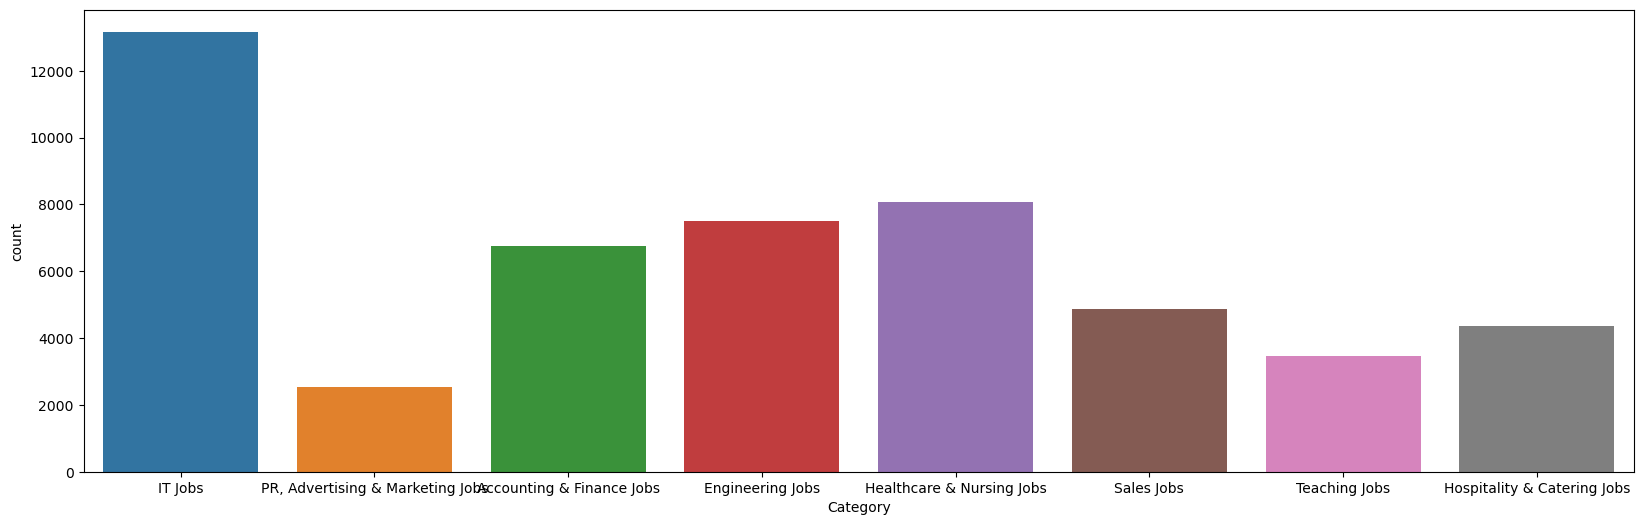

In [64]:
plt.figure(figsize=(20, 6))

sns.countplot(df_clean, x="Category", hue="Category")

### 2.8. Salary

#### 2.8.1 Parsing Salary to Float
Attempt to parse the whole column to *float*, `errors = coerce` is set to check whether there are values that **can not be parsed**.

In [67]:
# Convert column 'Salary' to float and save under another column for further examination
df_clean['SalaryFloat'] = pd.to_numeric(df_clean['Salary'], errors='coerce')

In [68]:
na_rows = df_clean[df_clean['SalaryFloat'].isna()]
na_rows['Salary'].value_counts()

Salary
                   963
-                  767
N/A                350
30000/year          11
29500 to 30500      10
35000/year           9
35000 per annum      6
44500 to 45500       6
42500/year           5
36500/year           5
50000/year           5
32000 to 33000       5
32500 per annum      5
29000 per annum      5
37500/year           5
38k                  4
28k                  4
52000 to 53000       4
45000 per annum      4
33500 to 34500       4
24500 to 25500       4
34500 to 35500       4
32k                  4
29500  ~  30500      3
39500  ~  40500      3
22500/year           3
32000/year           3
25000 to 26000       3
37500 per annum      3
25k                  3
16.55 per hour       3
35k                  3
32500/year           3
24000/year           3
30000 per annum      3
44500  ~  45500      3
40000/year           3
42000 to 43000       3
40000 per annum      3
22500 per annum      3
31500/year           3
22k                  3
29k                  3
3450

There are many value that are in different string format. Each will be handled differently with a customized parse function:

- 'N/A' and '-' : set as missing values to be handled afterhand
- 'p/h' and 'per hour': multiply with standard working hours per week and number of weeks per year
- ranged value (xxxxx to xxxxx): get the average value
- shorthand value (xxk): get the number and multiply 1000

`Salary` has the format of float and 2 decimal places.

In [70]:
def parse_salary(salary):
    # Remove any extra spaces and convert to lowercase
    salary_str = str(salary).strip().lower()

    # Check for missing value
    if not salary_str or salary_str in ['n/a', '-']:
        return np.nan
    
    # Check for hourly rate (e.g., "12.24 p/h" or "10 per hour")
    hourly_match = re.search(r'(\d+(\.\d+)?)\s*(p/h|per hour)', salary_str)
    if hourly_match:
        hourly_rate = float(hourly_match.group(1))
        annual_salary = hourly_rate * 40 * 52 # a standard working week has 40 hours and each year has 52 week
        return round(float(annual_salary), 2)
    
    # Check for a range (e.g., "44500 to 45500")
    range_match = re.search(r'(\d+)\s*(to|\-|\~)\s*(\d+)', salary_str)
    if range_match:
        avg_salary = (int(range_match.group(1)) + int(range_match.group(3)))/2
        return round(float(avg_salary), 2)

    # Check for shorthand notation (e.g., "46k")
    shorthand_match = re.search(r'(\d+(?:\.\d+)?)(k)', salary_str)
    if shorthand_match:
        amount = int(shorthand_match.group(1))
        multiplier = 1000
        return round(float(amount * multiplier), 2)
    
    # Otherwise, handle single values
    single_match = re.search(r'(\d+)', salary_str)
    if single_match:
        return round(float(single_match.group(1)), 2)


In [71]:
# apply the parse function
df_clean['Salary'] = df_clean['Salary'].apply(lambda x: pd.Series(parse_salary(x)))

In [72]:
log_entry = {
    'indexOfdf': "ALL",
    'Id': "ALL",
    'ColumnName': 'Salary',
    'Original': "ALL",
    'Modified': "ALL",
    'ErrorType': "Salary Wrong Format",
    'Fixing': "Parse the salary string to float in correct format using Regex to check and handle the original format of the string"
}

errors_df = pd.concat([errors_df, pd.DataFrame([log_entry])], ignore_index=True)

In [73]:
# remove the previously created SalaryFloat
df_clean = df_clean.drop(columns=['SalaryFloat'])

#### 2.8.2. Handle Salary Missing Values and Outliers

##### Examine the missing value

In [76]:
# examine the missing value
na_rows = df_clean[df_clean['Salary'].isna()]
na_rows['Salary'].isna().sum()

2351

There are 2351 missing values upon `Salary`.

In [78]:
na_rows.head()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
4,66960212,Accounts Payable Administrator,Littlehampton,The Recruitment Consultancy Ltd,non-specified,permanent,Accounting & Finance Jobs,NaN,20120723T000000,20121021T000000,totaljobs.com
12,68064630,Exclusive Service Managers,Lincolnshire,Action First Recruitment,non-specified,permanent,Healthcare & Nursing Jobs,NaN,20120321T120000,20120520T120000,totaljobs.com
31,70250824,Telesales Mortgage Consultant,UK,Axis Associate Consultants,non-specified,permanent,Sales Jobs,NaN,20130724T000000,20130823T000000,totaljobs.com
46,68691601,Chef for Leeds Nursery,Wetherby,Medico Recruitment,non-specified,contract,Hospitality & Catering Jobs,NaN,20120302T000000,20120501T000000,totaljobs.com
48,71183402,Digital Transformation / Multichannel Commerce...,South East London,Salt,non-specified,permanent,IT Jobs,NaN,20120214T120000,20120514T120000,totaljobs.com


##### Find the replacable value for the missing Salary
Examine the distribution of salary in different `Category`.

<Axes: xlabel='Category', ylabel='Salary'>

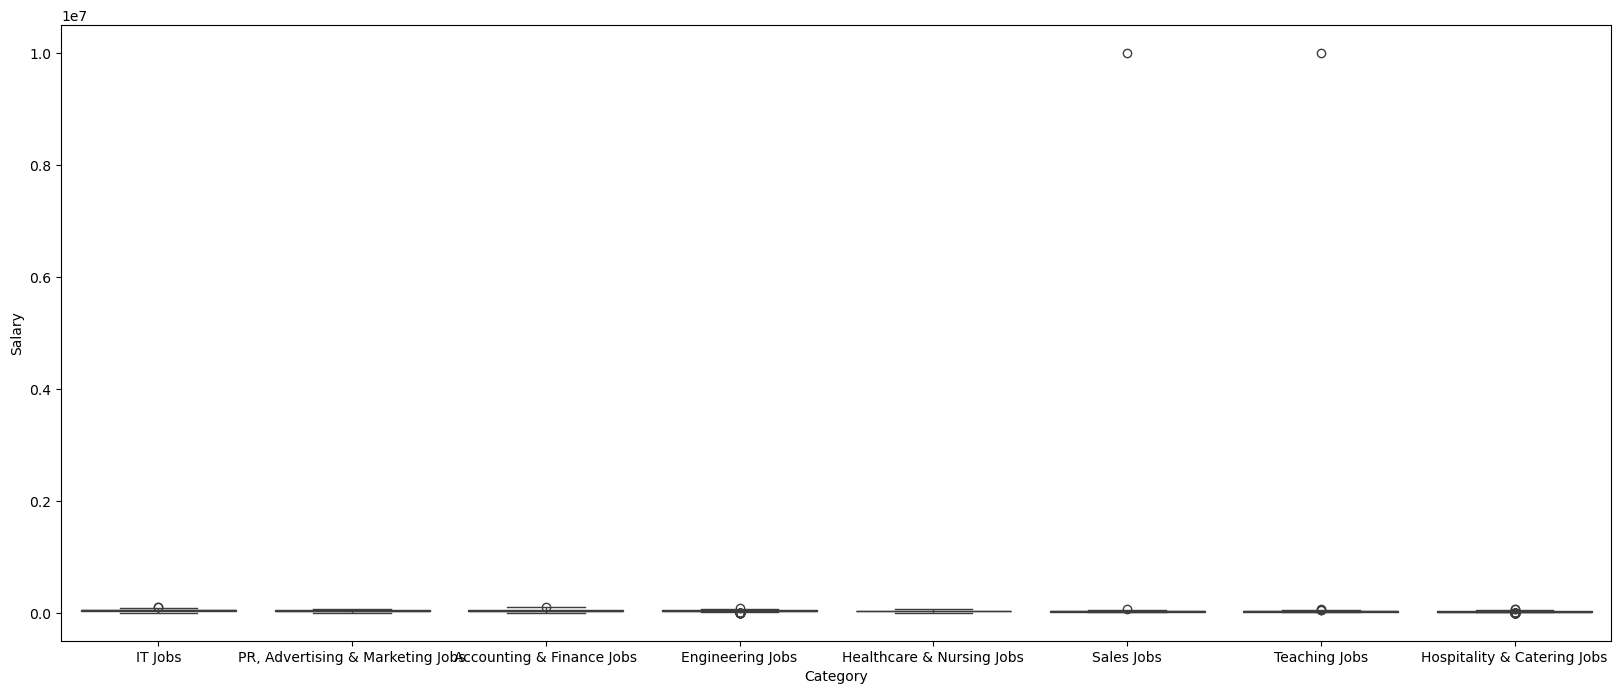

In [80]:
plt.figure(figsize=(20, 8))

sns.boxplot(x='Category', y='Salary', hue='Category', data=df_clean)

It seems like there are **outliers** which are at 1.000.0000 => these entries are considered to be replace

Attempt to remove these out of the visualization to examine the distribution clearer.

<Axes: xlabel='Category', ylabel='Salary'>

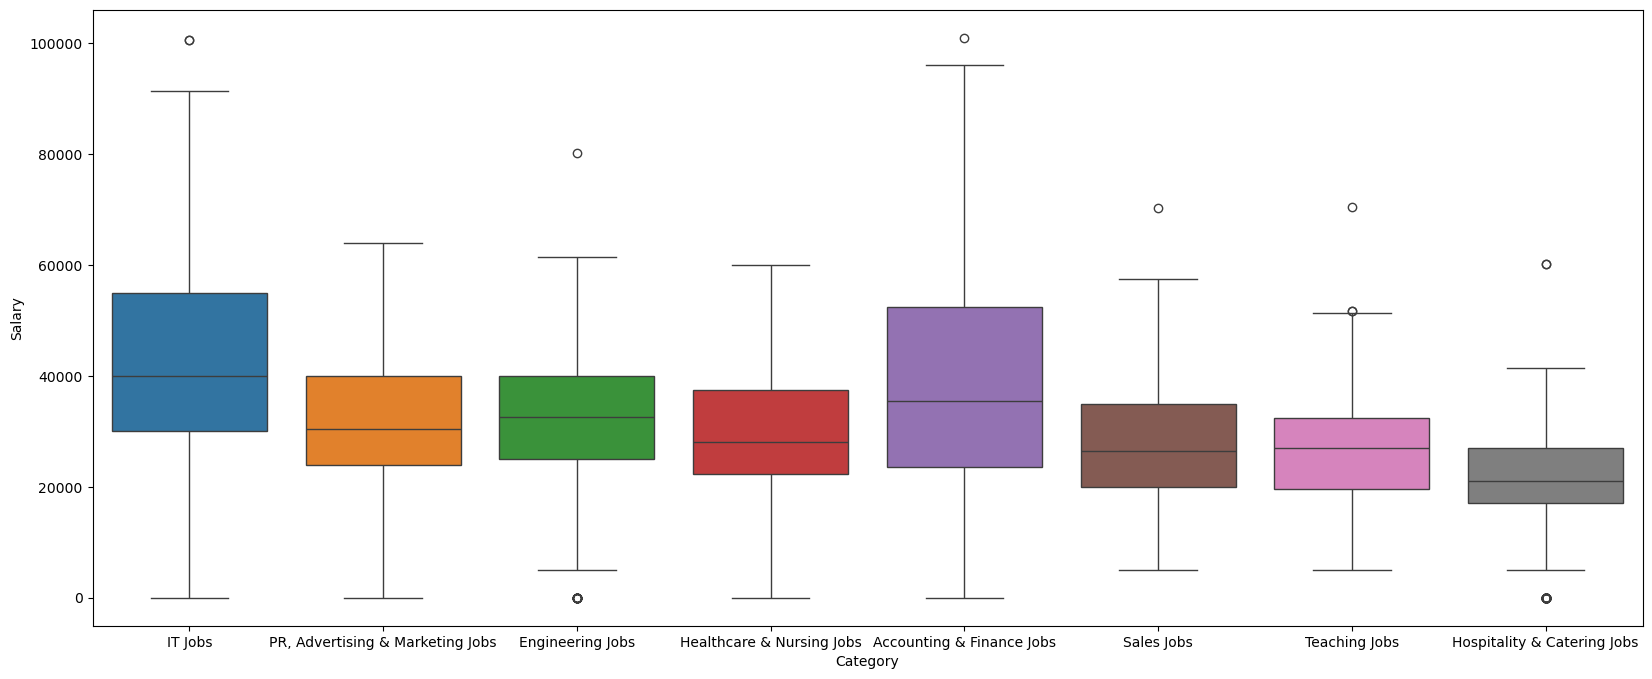

In [82]:
plt.figure(figsize=(20, 8))

sns.boxplot(x='Category', y='Salary', hue='Category', data=df_clean[df_clean['Salary'] < 1000000])

Jobs in different categories have different salary distribution and median.

=> missing values and outliers are imputed with the **median** salary of each category. *(median is chosen over mean due to the rounded value of common salary)*

In [84]:
mean_salary_by_category = df_clean.groupby('Category')['Salary'].median()
mean_salary_by_category

Category
Accounting & Finance Jobs           35500.0
Engineering Jobs                    32500.0
Healthcare & Nursing Jobs           28000.0
Hospitality & Catering Jobs         21000.0
IT Jobs                             40000.0
PR, Advertising & Marketing Jobs    30500.0
Sales Jobs                          26500.0
Teaching Jobs                       27000.0
Name: Salary, dtype: float64

##### Examine the outliers

In [86]:
df_clean[(df_clean['Salary'] > 200000)]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
28803,71193024,Qualified Teacher Ruth Miskin Literacy,West Midlands,PROTOCOL EDUCATION,full_time,contract,Teaching Jobs,10000000.0,20130919T150000,20131218T150000,jobs.guardian.co.uk
46204,68568793,Self Employed Field Sales Professionals,Colchester,London4Jobs,full_time,permanent,Sales Jobs,10000000.0,20121010T150000,20121209T150000,london4jobs.co.uk


##### Handle Outliers

In [88]:
df_before_replace = df_clean.copy()

df_clean['Salary'] = df_clean.apply(
    lambda x: mean_salary_by_category[x['Category']] if x['Salary'] > 200000 else x['Salary'],
    axis=1
)

In [89]:
log_change("Salary", df_before_replace, df_clean, "Contract Time Missing Values", "Replace ouliers Salary with the most common salary of the corresponding job category")

##### Handle Missing Values

In [91]:
df_before_replace = df_clean.copy()

df_clean['Salary'].fillna(df_clean['Category'].map(mean_salary_by_category), inplace=True)

In [92]:
log_change("Salary", df_before_replace, df_clean, "Salary Missing Values", "Fill Salary missing values with the most common salary of the corresponding job category")

### 2.9. OpenDate
Convert `OpenDate` to datetime format. `errors=coerce` is applied to check which can be parsed or not

In [94]:
# Convert to datetime, invalid dates will be NaT
df_clean['open_date_column_valid'] = pd.to_datetime(df['OpenDate'], errors='coerce', utc=True)

# Locate invalid ISO time strings
invalid_entries = df_clean[df_clean['open_date_column_valid'].isna()]

# Count of invalid ISO time strings
invalid_count = invalid_entries.shape[0]

# Examine
print("Invalid ISO time strings found:\n")
display(invalid_entries[['OpenDate', 'CloseDate']])
print("\nTotal count of invalid ISO time strings in Open Date:")
display(invalid_count)

Invalid ISO time strings found:



,OpenDate,CloseDate
17842,20121305T120000,20120811T120000



Total count of invalid ISO time strings in Open Date:


1

It seems like there is one entry that has the month value as **13**. Due to it close date is in August, the `OpenDate` month value is changed to **July**.

In [96]:
df_before_clean = df_clean.copy()
df_clean['OpenDate'].replace('20121305T120000', '20120705T120000', inplace=True)

log_change("OpenDate", df_before_clean, df_clean, "OpenDate wrong ISO string", "Replace OpenDate wrong ISO string with an estimated time-correct string")

##### Convert OpenDate to datetime (yyyy-MM-dd hh:mm:ss)

In [98]:
df_clean['OpenDate'] = pd.to_datetime(df_clean['OpenDate'], utc=True).dt.tz_convert(None) # do not consider the timezone

In [99]:
df_clean = df_clean.drop(columns=['open_date_column_valid'])

### 2.10. CloseDate
Convert `CloseDate` to datetime format. `errors=coerce` is applied to check which can be parsed or not


In [101]:
# Convert to datetime, invalid dates will be NaT
df_clean['close_date_column_valid'] = pd.to_datetime(df['CloseDate'], errors='coerce', utc=True)

# Locate invalid ISO time strings
invalid_entries = df_clean[df_clean['close_date_column_valid'].isna()]

# Count of invalid ISO time strings
invalid_count = invalid_entries.shape[0]

# Examine
print("Invalid ISO time strings found:\n")
display(invalid_entries[['OpenDate', 'CloseDate']])
print("\nTotal count of invalid ISO time strings in Open Date:")
display(invalid_count)

Invalid ISO time strings found:



,OpenDate,CloseDate



Total count of invalid ISO time strings in Open Date:


0

No invalid values found
##### Convert CloseDate to datetime (yyyy-MM-dd hh:mm:ss)

In [103]:
df_clean['CloseDate'] = pd.to_datetime(df_clean['CloseDate'], utc=True).dt.tz_convert(None)

In [104]:
df_clean = df_clean.drop(columns=['close_date_column_valid'])

### 2.11. Integrity Constraint Violation
`OpenDate` must be before `DateTime`. This logic needed to be checked

In [106]:
df_clean['violated'] = df_clean.apply(lambda x: \
                              x['OpenDate'] > x['CloseDate'] ,axis =1)

df_clean[df_clean['violated']]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName,violated
1704,69806450,Senior Business Field Sales,Brighton,Classic Consulting uk limited,non-specified,permanent,"PR, Advertising & Marketing Jobs",32500.0,2012-12-05 00:00:00,2012-10-06 00:00:00,totaljobs.com,True
12430,72484628,DB / DC Pension Consultant,Surrey,Capita,non-specified,permanent,Accounting & Finance Jobs,55000.0,2012-07-18 15:00:00,2012-06-18 15:00:00,jobsite.co.uk,True
17843,69019344,Managing Technical Architect,Milton Keynes,JAM Recruitment Ltd,non-specified,permanent,IT Jobs,68000.0,2013-09-25 00:00:00,2013-08-26 00:00:00,cv-library.co.uk,True
26041,66744187,cook bank,Glasgow,Bupa Care Services,full_time,non-specified,Hospitality & Catering Jobs,13689.0,2012-09-23 15:00:00,2012-06-25 15:00:00,Jobcentre Plus,True
31481,70265030,CHILDREN’S NURSE – RGN Taunton,Taunton,Community Outreach Consultancy Ltd,full_time,non-specified,Healthcare & Nursing Jobs,45000.0,2012-05-23 15:00:00,2012-04-23 15:00:00,staffnurse.com,True


There are **5 entries** that have `OpenDate` recorded after `CloseDate`. 

=> Switch the values of these 2

In [108]:
df_before_clean = df_clean.copy()

df_clean.loc[df_clean['violated'], ['OpenDate', 'CloseDate']] = df_clean.loc[df_clean['violated'], ['CloseDate', 'OpenDate']].values

# examine the fixed df
df_clean[df_clean['violated']]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName,violated
1704,69806450,Senior Business Field Sales,Brighton,Classic Consulting uk limited,non-specified,permanent,"PR, Advertising & Marketing Jobs",32500.0,2012-10-06 00:00:00,2012-12-05 00:00:00,totaljobs.com,True
12430,72484628,DB / DC Pension Consultant,Surrey,Capita,non-specified,permanent,Accounting & Finance Jobs,55000.0,2012-06-18 15:00:00,2012-07-18 15:00:00,jobsite.co.uk,True
17843,69019344,Managing Technical Architect,Milton Keynes,JAM Recruitment Ltd,non-specified,permanent,IT Jobs,68000.0,2013-08-26 00:00:00,2013-09-25 00:00:00,cv-library.co.uk,True
26041,66744187,cook bank,Glasgow,Bupa Care Services,full_time,non-specified,Hospitality & Catering Jobs,13689.0,2012-06-25 15:00:00,2012-09-23 15:00:00,Jobcentre Plus,True
31481,70265030,CHILDREN’S NURSE – RGN Taunton,Taunton,Community Outreach Consultancy Ltd,full_time,non-specified,Healthcare & Nursing Jobs,45000.0,2012-04-23 15:00:00,2012-05-23 15:00:00,staffnurse.com,True


In [109]:
log_change("OpenDate", df_before_clean, df_clean, "OpenDate and CloseDate wrong position", "Switch the value of OpenDate with CloseDate")
log_change("CloseDate", df_before_clean, df_clean, "OpenDate and CloseDate wrong position", "Switch the value of CloseDate with OpenDate")

In [110]:
# drop the violated column since this feature is for examination only
df_clean = df_clean.drop(columns=['violated'])

### 2.12. SourceName

In [112]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Auto-detect the wid

df['SourceName'].value_counts()

SourceName
totaljobs.com                     9224
cv-library.co.uk                  7160
jobsite.co.uk                     3314
cwjobs.co.uk                      2870
staffnurse.com                    2536
caterer.com                       2135
Jobcentre Plus                    1950
careworx.co.uk                    1799
jobserve.com                      1579
jobs.catererandhotelkeeper.com    1142
jobs.guardian.co.uk               1074
MyUkJobs                          1002
fish4.co.uk                        970
theitjobboard.co.uk                747
rengineeringjobs.com               658
gojobsearch.co.uk                  634
planetrecruit.com                  585
salestarget.co.uk                  582
GAAPweb                            550
ukstaffsearch.com                  448
technojobs.co.uk                   434
strike-jobs.co.uk                  426
Brand Republic Jobs                392
justengineers.net                  384
eFinancialCareers                  361
hays.co.uk    

## Saving cleaned data
Save the parsed and cleaned data as well as the error list, named as:
- cleaned_dataset1.csv
- errors_list.csv

In [114]:
df_clean.to_csv('cleaned_dataset1.csv', index=False)  
errors_df.to_csv('errors_list.csv', index=False)  